<a href="https://colab.research.google.com/github/yamini542/Applied-AI/blob/main/Copy_of_AI_ASS_Tas1_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time-Series-prediction-task1
ime Series – Prediction Task
1. Heart rate prediction Sudden variations in heart rate could lead to the risks of stroke, heart failure, sudden cardiac arrest, 
and also death. Therefore, monitoring the heart rate is critical as it helps to discover the irregularities of the heart’s function to detect health problems. With the advancements in AI and stream processing 
technologies, more accurate future predictions also can be made, allowing healthcare sectors to detect and treat such situations at early stages.
In this task, you are given a time series collected using medical sensors, approximately four hours of 
data for a patient. 

Using these data, you need to build an effective time series model to predict the next twenty (20) observations (minutes) of heart rate data (Lifetouch Heart Rate). 

You can use any time series model.

In [1]:
#importing necessary libraries
!pip install pmdarima

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp

Downloading...
From: https://drive.google.com/uc?id=1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
To: /content/PT_Train.csv
100% 7.17k/7.17k [00:00<00:00, 8.94MB/s]


In [3]:
#loading the data set from the guthub link
df=pd.read_csv('PT_Train.csv')

In [ ]:
df.head()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [4]:
# Check for missing values
print(df.isna().sum())



Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64


In [5]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [6]:
df['Timestamp (GMT)'] = list(range(0, len(df['Timestamp (GMT)'])))


In [7]:
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,139,41,NaN,NaN
1,1,144,40,92.0,140.0
2,2,140,42,89.0,144.0
3,3,138,45,93.0,141.0
4,4,133,42,94.0,134.0
...,...,...,...,...,...
221,221,159,51,NaN,NaN
222,222,151,64,NaN,NaN
223,223,140,64,NaN,NaN
224,224,140,55,NaN,NaN


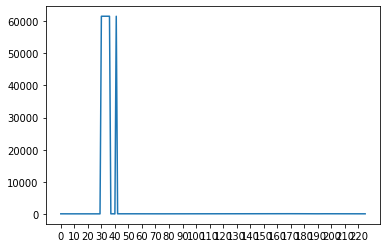

In [8]:

# plot time series
plt.plot(df['Timestamp (GMT)'],df['Lifetouch Heart Rate'])
plt.xticks(np.arange(min(df['Timestamp (GMT)']), max(df['Timestamp (GMT)'])+1, 10)) # define x-axis step size
plt.show()

In [ ]:
df.shape

(226, 5)

In [9]:
# Handle missing values
#df = df.fillna(df.mean())
df=df.fillna(df.bfill())



In [10]:
df.head(10)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,139,41,92.0,140.0
1,1,144,40,92.0,140.0
2,2,140,42,89.0,144.0
3,3,138,45,93.0,141.0
4,4,133,42,94.0,134.0
5,5,132,41,92.0,134.0
6,6,132,47,92.0,135.0
7,7,133,44,92.0,135.0
8,8,136,45,94.0,136.0
9,9,137,42,93.0,138.0


In [11]:
#Impute missing values with a suitable value (e.g. the mean)
df["Oximeter SpO2"].fillna(df["Oximeter SpO2"].mean(), inplace=True)
df["Oximeter Pulse"].fillna(df["Oximeter Pulse"].mean(), inplace=True)

Data preprocessing for this dataset would involve a few steps:

1.Checking for missing or invalid data: In this dataset, some entries in the Oximeter SpO2 and Oximeter Pulse columns are missing or have a value of -1. These entries need to be handled appropriately, either by removing them or imputing them with a suitable value.

2.Handling outliers: The data point with a heart rate of 61441 and a respiration rate of 61441 is likely an error and should be removed.

Formatting the timestamp column: The timestamp column should be formatted as a datetime object, if it is not already.

Normalizing the data: The data in the different columns may have different ranges, which could cause problems during modeling. Normalizing the data, for example by scaling it to a range between 0 and 1, can help prevent this.

Splitting the dataset: Finally, the dataset should be split into training and testing sets, so that the model can be trained and evaluated on different data.

In [12]:
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,139,41,92.000000,140.000000
1,1,144,40,92.000000,140.000000
2,2,140,42,89.000000,144.000000
3,3,138,45,93.000000,141.000000
4,4,133,42,94.000000,134.000000
...,...,...,...,...,...
221,221,159,51,81.775229,124.513761
222,222,151,64,81.775229,124.513761
223,223,140,64,81.775229,124.513761
224,224,140,55,81.775229,124.513761


In [13]:
#here we are replacing the negative values 
df=df.replace(-1, np.nan, inplace=False)

In [14]:
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,139,41,92.000000,140.000000
1,1,144,40,92.000000,140.000000
2,2,140,42,89.000000,144.000000
3,3,138,45,93.000000,141.000000
4,4,133,42,94.000000,134.000000
...,...,...,...,...,...
221,221,159,51,81.775229,124.513761
222,222,151,64,81.775229,124.513761
223,223,140,64,81.775229,124.513761
224,224,140,55,81.775229,124.513761


In [15]:
#handling-outliers: here for the heart rate we have consider the values which are between 40-200 as we know that 
df = df[(df['Lifetouch Heart Rate'] > 40) & (df['Lifetouch Heart Rate'] < 200)]


In [16]:
df

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,0,139,41,92.000000,140.000000
1,1,144,40,92.000000,140.000000
2,2,140,42,89.000000,144.000000
3,3,138,45,93.000000,141.000000
4,4,133,42,94.000000,134.000000
...,...,...,...,...,...
221,221,159,51,81.775229,124.513761
222,222,151,64,81.775229,124.513761
223,223,140,64,81.775229,124.513761
224,224,140,55,81.775229,124.513761


#Model-1: ARIMA
Step1: checking for the stationarity
step2:


In [17]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')
     

In [18]:
check_stationarity(df['Lifetouch Heart Rate'])


p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


#making the series stationary for the forecasting

In [19]:
import warnings
warnings.filterwarnings("ignore")

note: A p-value less than or equal to 0.05 (typically 0.05) is statistically significant and suggests that the results are not due to chance. In this case, since the p-value is 0.1, it suggests that the series is stationary. 

In [24]:
#add new column 'Log-Sales' with log transformed values
df1=df[['Lifetouch Heart Rate','Timestamp (GMT)']].copy()



(218, 6)


,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse,Log-Sales
0,0,139,41,92.0,140.0,4.934474
1,1,144,40,92.0,140.0,4.969813
2,2,140,42,89.0,144.0,4.941642
3,3,138,45,93.0,141.0,4.927254
4,4,133,42,94.0,134.0,4.890349


In [25]:
df1

,Lifetouch Heart Rate,Timestamp (GMT)
0,139,0
1,144,1
2,140,2
3,138,3
4,133,4
...,...,...
221,159,221
222,151,222
223,140,223
224,140,224


In [26]:
df1['Log-Sales'] = np.log(df1['Lifetouch Heart Rate']) 


In [27]:
df1

,Lifetouch Heart Rate,Timestamp (GMT),Log-Sales
0,139,0,4.934474
1,144,1,4.969813
2,140,2,4.941642
3,138,3,4.927254
4,133,4,4.890349
...,...,...,...
221,159,221,5.068904
222,151,222,5.017280
223,140,223,4.941642
224,140,224,4.941642


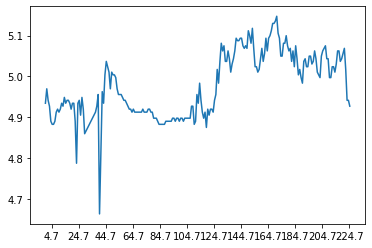

In [29]:
# plot time series
plt.plot(df1['Timestamp (GMT)'],df1['Log-Sales'])
plt.xticks(np.arange(min(df1['Log-Sales']), max(df1['Timestamp (GMT)'])+1, 20)) # define x-axis step size
plt.show()
     

#Deseasonalising

In [31]:
df1['Deseasonalised-Sales'] = df1[['Log-Sales']].diff(axis=0, periods=12)
df1.head(15)

,Lifetouch Heart Rate,Timestamp (GMT),Log-Sales,Deseasonalised-Sales
0,139,0,4.934474,NaN
1,144,1,4.969813,NaN
2,140,2,4.941642,NaN
3,138,3,4.927254,NaN
4,133,4,4.890349,NaN
5,132,5,4.882802,NaN
6,132,6,4.882802,NaN
7,133,7,4.890349,NaN
8,136,8,4.912655,NaN
9,137,9,4.919981,NaN


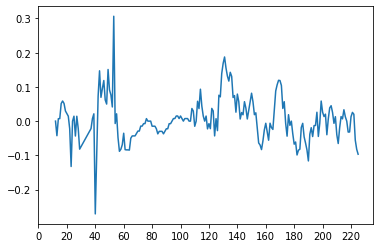

In [34]:

plt.plot(df1['Timestamp (GMT)'],df1['Deseasonalised-Sales'])
plt.xticks(np.arange(min(df1['Timestamp (GMT)']), max(df1['Timestamp (GMT)'])+1, 20)) # define x-axis step size
plt.show()

#Differencing

In [35]:

df1['Differenced-Sales'] = df1[['Deseasonalised-Sales']].diff(axis=0, periods=1)
df1.head(15)

,Lifetouch Heart Rate,Timestamp (GMT),Log-Sales,Deseasonalised-Sales,Differenced-Sales
0,139,0,4.934474,NaN,NaN
1,144,1,4.969813,NaN,NaN
2,140,2,4.941642,NaN,NaN
3,138,3,4.927254,NaN,NaN
4,133,4,4.890349,NaN,NaN
5,132,5,4.882802,NaN,NaN
6,132,6,4.882802,NaN,NaN
7,133,7,4.890349,NaN,NaN
8,136,8,4.912655,NaN,NaN
9,137,9,4.919981,NaN,NaN


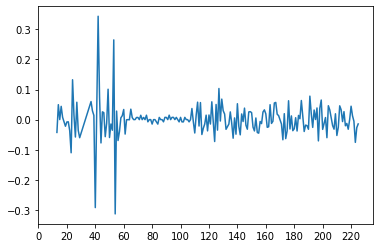

In [36]:
plt.plot(df1['Timestamp (GMT)'],df1['Differenced-Sales'])
plt.xticks(np.arange(min(df1['Timestamp (GMT)']), max(df1['Timestamp (GMT)'])+1, 20)) # define x-axis step size
plt.show()

In [37]:
check_stationarity(df1['Differenced-Sales'][13:])


p value: 0.1
Result: The series is stationary 

